In [1]:
import matplotlib.pyplot as plt

In [2]:
import xarray as xr

In [10]:
f_cu = xr.open_dataset('/home/shasko/Desktop/internship_2025/evaluation_set/test_1_patterns_Cu_cubic_COD_peakslabeled_noisy.nc')

In [9]:
f_nacl = xr.open_dataset('/home/shasko/Desktop/internship_2025/evaluation_set/test_1_patterns_NaCl_cubic_peakslabeled_noisy.nc')

In [21]:
f_psn = xr.open_dataset('/home/shasko/Desktop/internship_2025/evaluation_set/test_1_patterns_PSn_tetragonal_COD_peakslabeled_noisy.nc')

In [29]:
f_multiphase_dans = xr.open_dataset('/home/shasko/Desktop/internship_2025/saved_data/ds_multiphase_dans_psn_nacl_1.nc')

In [6]:
f_additive = xr.open_dataset('/nsls2/users/shasko/Repos/internship_2025/saved_data/ds_additive_nacl_baso4_1.nc')

In [30]:
x = f_multiphase_dans['x'].values

cu_inten = f_cu['Intensities'].values
nacl_inten = f_nacl['Intensities'].values
psn_inten = f_psn['Intensities'].values
multi_inten = f_multiphase_dans['Intensities'].values
# add_inten = f_additive['AddedIntensities'].values

In [14]:
%matplotlib widget

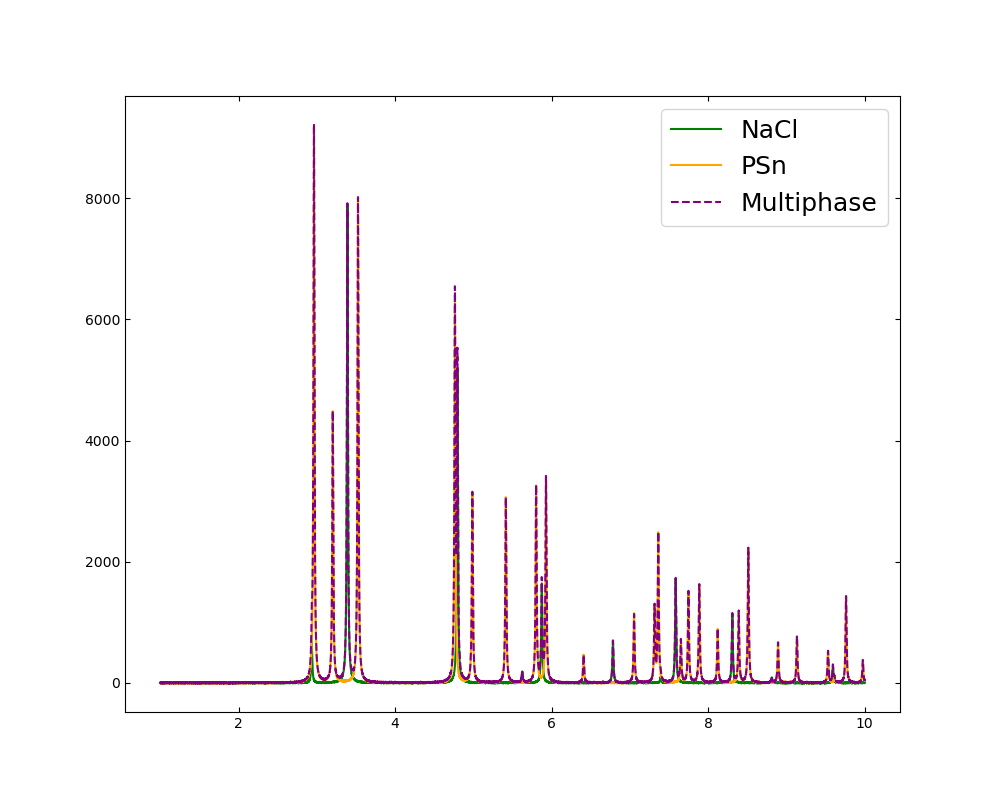

In [36]:
plt.figure(figsize=(10,8))

plt.plot(x, nacl_inten[0], color='green', label='NaCl')
plt.plot(x, psn_inten[0], color='orange', label='PSn')

plt.plot(x, multi_inten[0], color='purple', linestyle='--', label='Multiphase')

plt.legend(fontsize=18)
plt.tick_params(axis='both', direction='in', top=True, right=True)
plt.savefig('/home/shasko/Desktop/internship_2025/saved_figures/multiphase_for_poster.png')
plt.show()

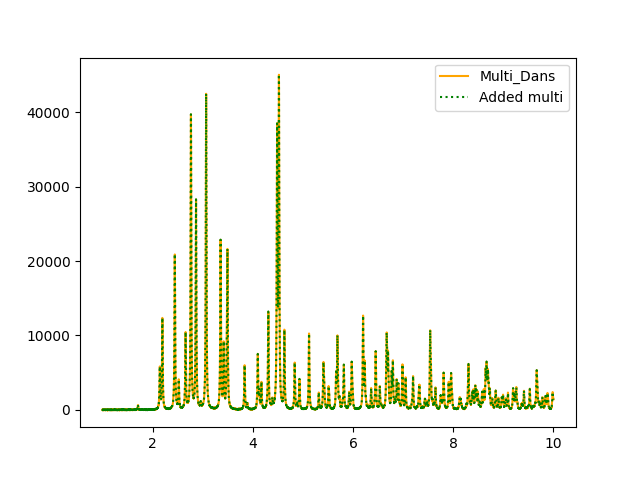

In [14]:
plt.figure()
# plt.plot(x, nacl_inten[0], color='black', label='NaCl')
# plt.plot(x, baso4_inten[0], color='purple', label='baso4')

plt.plot(x, multi_inten[0], color='orange', label='Multi_Dans')
plt.plot(x, add_inten[0], color='green', label='Added multi', linestyle=":")
plt.legend()
plt.show()

Experimental Data Vis

In [3]:
import pandas as pd
import sys, os

In [ ]:
path = '/home/shasko/Downloads/standard_patterns_for_Sonia/xrd_jogged'
file = 'xrd_Ni_std_brac1_20250720-194434_7d7ebd_primary-1_mean_tth.chi'
pattern = pd.read_csv(os.path.join(path,file), delimiter='\s+', header=None, skiprows=1, names=['tth','intensity'])

(4096,)
(4096,)


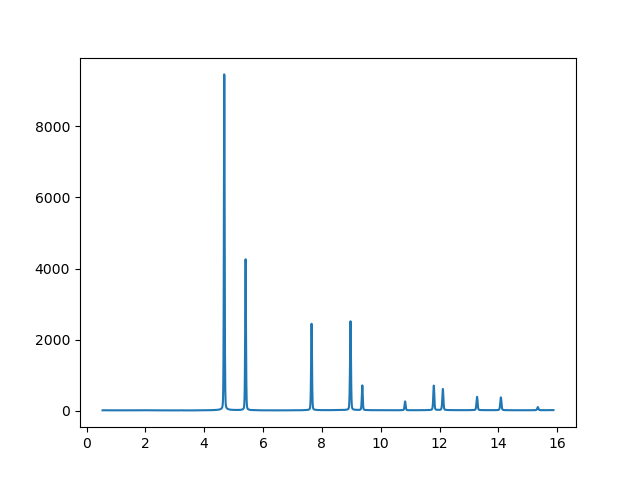

In [44]:
plt.figure()
tth_exp = pattern['tth']
inten_exp = pattern['intensity']
print(tth_exp.shape)
print(inten_exp.shape)
plt.plot(tth_exp, inten_exp)
plt.show()

In [51]:
import numpy as np
file = '/home/shasko/Downloads/standard_patterns_for_Sonia/xrd_jogged/xrd_Ni_std_brac1_20250720-194434_7d7ebd_primary-1_mean_tth.chi'
pattern = pd.read_csv(os.path.join(file), delimiter='\s+', header=None, skiprows=1, names=['tth','intensity'])

tth_exp = pattern['tth']
inten_exp = pattern['intensity']
tth_exp = np.array(tth_exp)
inten_exp = np.array(inten_exp)
window_size = tth_exp.shape[0]


In [ ]:
# Scale the data
inten_exp_sc = np.zeros_like(inten_exp)

for j in range(inten_exp.shape[0]):
    max_inten = np.max(inten_exp[j])
    min_inten = np.min(inten_exp[j])
    inten_exp_sc[j] = (inten_exp[j] - min_inten) / (max_inten - min_inten)

print(inten_exp_sc.shape[0], inten_exp_sc.shape[1],)
inten_exp_reshaped = inten_exp_sc.reshape(inten_exp_sc.shape[0], inten_exp_sc.shape[1], 1)

/tmp/ipykernel_26310/2041897901.py:7: RuntimeWarning: invalid value encountered in scalar divide
  inten_exp_sc[j] = (inten_exp[j] - min_inten) / (max_inten - min_inten)


IndexError: tuple index out of range

In [107]:
files = ['/home/shasko/Downloads/standard_patterns_for_Sonia/xrd_jogged/xrd_Ni_std_brac1_20250720-194434_7d7ebd_primary-1_mean_tth.chi',
         '/home/shasko/Downloads/standard_patterns_for_Sonia/xrd_jogged/xrd_Ni_std_brac1_20250721-000840_b6458b_primary-1_mean_tth.chi',
         '/home/shasko/Downloads/standard_patterns_for_Sonia/xrd_jogged/xrd_Ni_std_brac1_20250721-043248_1fec02_primary-1_mean_tth.chi']

#patterns = [pd.read_csv(os.path.join(file), delimiter='\s+', header=None, skiprows=1, names=['tth','intensity']) for file in files]

intens = [pd.read_csv(os.path.join(file), delimiter='\s+', header=None, skiprows=1)[1].values for file in files]
tth = [pd.read_csv(os.path.join(file), delimiter='\s+', header=None, skiprows=1)[0].values for file in files]


#intens = [np.array(patterns[0]['intensity']), np.array(patterns[1]['intensity']), np.array(patterns[2]['intensity'])]
#tth = [patterns[0]['tth'], patterns[1]['tth'], patterns[2]['tth']]


In [108]:

tth_exp_unpadded = np.mean(tth, axis=0)
inten_exp_unpadded = np.mean(intens, axis=0)


In [109]:

# tth_exp = pattern['tth']
# inten_exp = pattern['intensity']
tth_exp_unpadded = np.array(tth_exp_unpadded)
inten_exp_unpadded = np.array(inten_exp_unpadded)

tth_exp = np.zeros((11837, ))
inten_exp = np.zeros((11837, ))


In [110]:

for i in range(tth_exp_unpadded.shape[0]):
    tth_exp[i] = tth_exp_unpadded[i]


In [111]:
tth_exp_unpadded

array([ 0.54330802,  0.54705157,  0.55079512, ..., 15.86565556,
       15.86939911, 15.87314265])

In [112]:
tth_exp

array([0.54330802, 0.54705157, 0.55079512, ..., 0.        , 0.        ,
       0.        ])

In [114]:
inten_exp_unpadded.shape[0]

4096

In [115]:
inten_exp_unpadded.shape

(4096,)

In [116]:
inten_exp_unpadded[0]

np.float64(14.180169105529785)

In [119]:
for i in range(inten_exp_unpadded.shape[0]):
    inten_exp[i] = inten_exp_unpadded[i]

In [121]:
inten_exp = inten_exp.reshape(1, inten_exp.shape[0])

In [129]:
tth_exp = np.linspace(1,10,11837)

In [130]:
tth_exp

array([ 1.        ,  1.00076039,  1.00152078, ...,  9.99847922,
        9.99923961, 10.        ])

In [132]:
tth_exp.shape

(11837,)

In [125]:

path = '/home/shasko/Desktop/internship_2025/'
filenames = [
             'saved_data/gaussian_functions_small_var_amp_noisy_11837_stddevamp.nc',
             'saved_data/gaussian_functions_medium_var_amp_noisy_11837_stddevamp.nc',
             'saved_data/gaussian_functions_large_var_amp_noisy_11837_stddevamp.nc',
             'saved_data/gaussian_functions_very_large_var_amp_noisy_11837_stddevamp.nc',
             'saved_data/lorentzian_functions_small_var_amps_noisy_11837_3000.nc',
             'saved_data/lorentzian_functions_medium_var_amps_noisy_11837_3000.nc',
             'saved_data/lorentzian_functions_large_var_amps_noisy_11837_3000.nc',
             'saved_data/lorentzian_functions_very_large_var_amps_noisy_11837_3000.nc',
             'saved_data/psuedovoigt_functions_small_var_amps_noisy_11837_3000.nc',
             'saved_data/psuedovoigt_functions_medium_var_amps_noisy_11837_3000.nc',
             'saved_data/psuedovoigt_functions_large_var_amps_noisy_11837_3000.nc',
             'saved_data/psuedovoigt_functions_very_large_var_amps_noisy_11837_3000.nc',
             'saved_data/asymmetric_functions_small_noisy.nc',
             'saved_data/asymmetric_functions_medium_noisy.nc',
             'saved_data/asymmetric_functions_large_noisy.nc',
             'saved_data/asymmetric_functions_very_large_noisy.nc'
             ]
trial = f'8_n_batch_{64}'
             
# List comprehension to get all path names
full_paths = [f'{path}{i}' for i in filenames]
all_datasets = [xr.open_dataset(p, engine='netcdf4') for p in full_paths] # list of all the Datasets

combined = xr.concat(all_datasets, dim="pattern")
window_size = combined["x"].shape[0]
gaussians = combined["Intensities"]
binary = combined["BinaryArr"]
x = combined["x"].values

In [128]:
x

array([ 1.        ,  1.00076039,  1.00152078, ...,  9.99847922,
        9.99923961, 10.        ])

In [127]:
x.shape

(11837,)

Dan's data from another lab for LaB6

In [9]:
import numpy as np
import csv

In [91]:
file = '/home/shasko/Downloads/LaB6.xye'


def read_xye_delimited(filepath, delimiter=' '):
    x_values = []
    y_values = []
    e_values = []
    with open(filepath, 'r') as f:
        reader = csv.reader(f, delimiter=delimiter)
        for row in reader:
            if len(row) == 4:  # Ensure there are three columns (X, Y, E)
                try:
                    x_values.append(float(row[1]))
                    y_values.append(float(row[2]))
                    e_values.append(float(row[3]))
                except ValueError:
                    print(f"Skipping malformed row: {row}")
    return x_values, y_values, e_values


x, y, e = read_xye_delimited(f'{file}', delimiter=' ')

Skipping malformed row: ['#', 'No', '2Theta', 'correction']


In [92]:
%matplotlib widget

<function matplotlib.pyplot.show(block=None)>

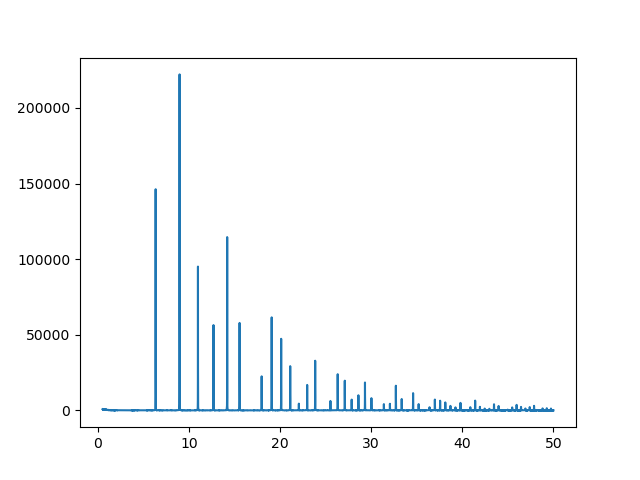

In [93]:
plt.figure()
plt.plot(x, y)
plt.show

In [95]:
len(x)

49574

In [85]:
x = np.array(x)
x_rescaled = 1 + (x / 50) * 9

bins_custom = np.linspace(1, 10, 11837)

# Bin x and aggregate y values per bin
df = pd.DataFrame({'x_rescaled': x_rescaled, 'y': y})
df['x_bin'] = pd.cut(df['x_rescaled'], bins=bins_custom)

# Aggregate (e.g. average y per bin)
binned_df = df.groupby('x_bin').agg({'x_rescaled': 'mean', 'y': 'mean'}).dropna()

# Final binned x and y values
x_binned = binned_df['x_rescaled'].values
y_binned = binned_df['y'].values


/tmp/ipykernel_102099/899327171.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_df = df.groupby('x_bin').agg({'x_rescaled': 'mean', 'y': 'mean'}).dropna()


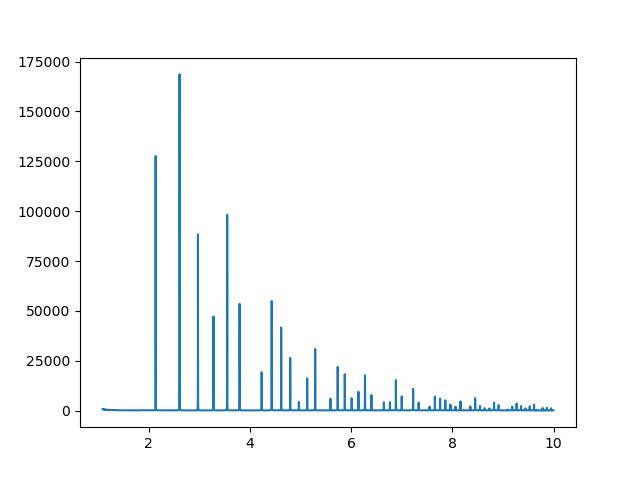

In [86]:
plt.figure()
plt.plot(x_binned, y_binned)
plt.show()



In [87]:
binned_df.to_csv('/home/shasko/Downloads/LaB6_from_Dan_rebinned.csv', index=False)

In [88]:
print(binned_df.head())
print(binned_df.columns)


                  x_rescaled           y
x_bin                                   
(1.0897, 1.0905]    1.090180  785.081002
(1.0905, 1.0912]    1.090809  780.674903
(1.0912, 1.092]     1.091617  758.234489
(1.092, 1.0928]     1.092426  741.466119
(1.0928, 1.0935]    1.093145  742.394740
Index(['x_rescaled', 'y'], dtype='object')


In [89]:
df = pd.read_csv('/home/shasko/Downloads/LaB6_from_Dan_rebinned.csv')  # No need for delimiter, header=None, or skiprows
x = df['x_rescaled'].values
y = df['y'].values


In [90]:
[x]
x.shape

(11717,)

In [76]:
files_wo_path = [
                'LaB6_brac1_xrd_calib_20250720-183936_bdf715_primary-1_mean_tth.chi',
                ]
path = '/home/shasko/Downloads/standard_patterns_for_Sonia'
files = [f'{path}/{filename}' for filename in files_wo_path]
intens = [pd.read_csv(os.path.join(file), delimiter='\s+', header=None, skiprows=1)[1].values for file in files]
tth = [pd.read_csv(os.path.join(file), delimiter='\s+', header=None, skiprows=1)[0].values for file in files]

In [77]:
tth

[array([ 0.54330802,  0.54705157,  0.55079512, ..., 15.86565556,
        15.86939911, 15.87314265])]